In [83]:
import pandas as pd
import itertools
from sklearn.metrics import mean_absolute_error
import warnings

# Suppress all warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import plotly.express as px

# Data Loading

In [3]:
file_path = "C:/Users/user_name/Downloads/archive (10)/DailyDelhiClimateTrain.csv"

In [4]:
train_df = pd.read_csv(file_path)

In [7]:
train_df

,date,meantemp,humidity,wind_speed,meanpressure
0,2013-01-01,10.000000,84.500000,0.000000,1015.666667
1,2013-01-02,7.400000,92.000000,2.980000,1017.800000
2,2013-01-03,7.166667,87.000000,4.633333,1018.666667
3,2013-01-04,8.666667,71.333333,1.233333,1017.166667
4,2013-01-05,6.000000,86.833333,3.700000,1016.500000
...,...,...,...,...,...
1457,2016-12-28,17.217391,68.043478,3.547826,1015.565217
1458,2016-12-29,15.238095,87.857143,6.000000,1016.904762
1459,2016-12-30,14.095238,89.666667,6.266667,1017.904762
1460,2016-12-31,15.052632,87.000000,7.325000,1016.100000


In [8]:
file_path2 = "C:/Users/user_name/Downloads/archive (10)/DailyDelhiClimateTest.csv"

In [9]:
test_df = pd.read_csv(file_path2)

In [11]:
print(train_df.info())
print(test_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1462 entries, 0 to 1461
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   date          1462 non-null   object 
 1   meantemp      1462 non-null   float64
 2   humidity      1462 non-null   float64
 3   wind_speed    1462 non-null   float64
 4   meanpressure  1462 non-null   float64
dtypes: float64(4), object(1)
memory usage: 57.2+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114 entries, 0 to 113
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   date          114 non-null    object 
 1   meantemp      114 non-null    float64
 2   humidity      114 non-null    float64
 3   wind_speed    114 non-null    float64
 4   meanpressure  114 non-null    float64
dtypes: float64(4), object(1)
memory usage: 4.6+ KB
None


In [12]:
train_df["date"] = pd.to_datetime(train_df["date"])
print(train_df.info())
test_df["date"] = pd.to_datetime(test_df["date"])
print(test_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1462 entries, 0 to 1461
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   date          1462 non-null   datetime64[ns]
 1   meantemp      1462 non-null   float64       
 2   humidity      1462 non-null   float64       
 3   wind_speed    1462 non-null   float64       
 4   meanpressure  1462 non-null   float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 57.2 KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114 entries, 0 to 113
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   date          114 non-null    datetime64[ns]
 1   meantemp      114 non-null    float64       
 2   humidity      114 non-null    float64       
 3   wind_speed    114 non-null    float64       
 4   meanpressure  114 non-null    float64       
dtypes: datetime64[ns](1)

In [15]:
df = pd.concat([train_df, test_df])
df

,date,meantemp,humidity,wind_speed,meanpressure
0,2013-01-01,10.000000,84.500000,0.000000,1015.666667
1,2013-01-02,7.400000,92.000000,2.980000,1017.800000
2,2013-01-03,7.166667,87.000000,4.633333,1018.666667
3,2013-01-04,8.666667,71.333333,1.233333,1017.166667
4,2013-01-05,6.000000,86.833333,3.700000,1016.500000
...,...,...,...,...,...
109,2017-04-20,34.500000,27.500000,5.562500,998.625000
110,2017-04-21,34.250000,39.375000,6.962500,999.875000
111,2017-04-22,32.900000,40.900000,8.890000,1001.600000
112,2017-04-23,32.875000,27.500000,9.962500,1002.125000


In [17]:
df = df[["date", "meantemp"]]
df

,date,meantemp
0,2013-01-01,10.000000
1,2013-01-02,7.400000
2,2013-01-03,7.166667
3,2013-01-04,8.666667
4,2013-01-05,6.000000
...,...,...
109,2017-04-20,34.500000
110,2017-04-21,34.250000
111,2017-04-22,32.900000
112,2017-04-23,32.875000


In [18]:
df = df.set_index("date")
df.head()

,meantemp
date,
2013-01-01,10.000000
2013-01-02,7.400000
2013-01-03,7.166667
2013-01-04,8.666667
2013-01-05,6.000000


In [19]:
weekly_mean = df["meantemp"].resample('W').mean()
weekly_mean

date
2013-01-06     7.705556
2013-01-13    12.343537
2013-01-20    13.642857
2013-01-27    12.329592
2013-02-03    15.736905
                ...    
2017-04-02    30.203515
2017-04-09    28.805189
2017-04-16    29.820862
2017-04-23    33.511508
2017-04-30    32.000000
Freq: W-SUN, Name: meantemp, Length: 226, dtype: float64

In [20]:
#train = df[:1300][["meantemp"]]
#test = df[1300:][["meantemp"]]
train = weekly_mean[:200]
test = weekly_mean[200:]

In [24]:
train.head()

date
2013-01-06     7.705556
2013-01-13    12.343537
2013-01-20    13.642857
2013-01-27    12.329592
2013-02-03    15.736905
Freq: W-SUN, Name: meantemp, dtype: float64

In [25]:
test.head()

date
2016-11-06    24.163782
2016-11-13    23.792786
2016-11-20    21.961941
2016-11-27    22.842147
2016-12-04    20.428841
Freq: W-SUN, Name: meantemp, dtype: float64

# Data Exploration

<Axes: xlabel='date'>

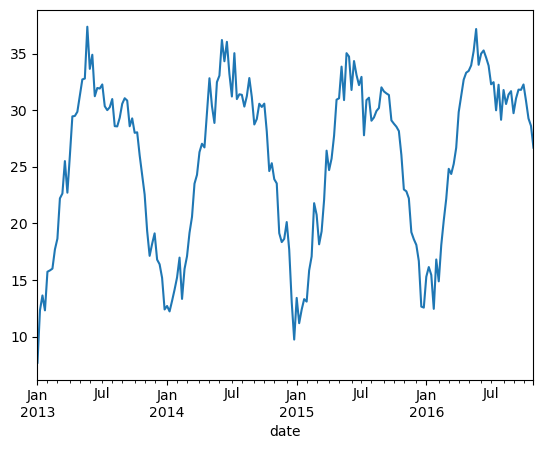

In [44]:
train.plot()

In [49]:
# We will reset the index for some data exploration

train = train.reset_index("date")

## Histogram of temperature distribution

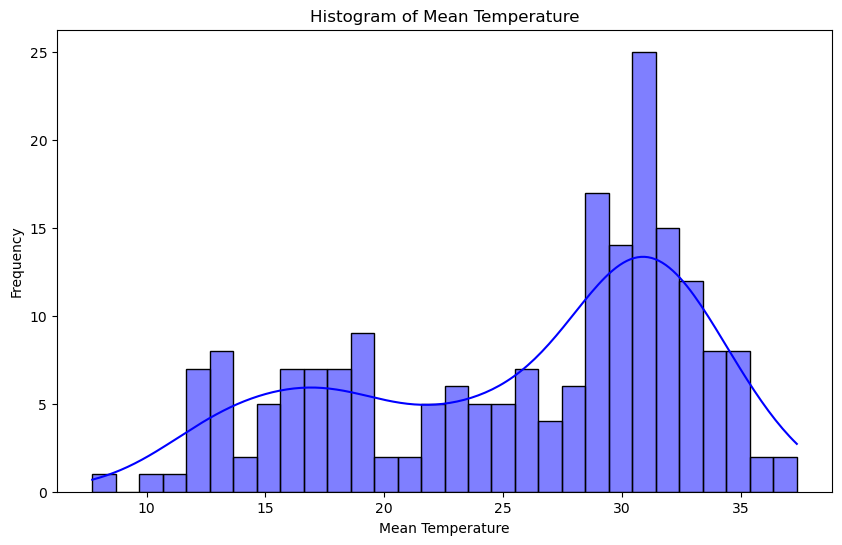

In [84]:
plt.figure(figsize=(10, 6))
sns.histplot(train['meantemp'], bins=30, kde=True, color='blue')


plt.xlabel('Mean Temperature')
plt.ylabel('Frequency')
plt.title('Histogram of Mean Temperature')


plt.show()

## Scatter plot of temperature over time

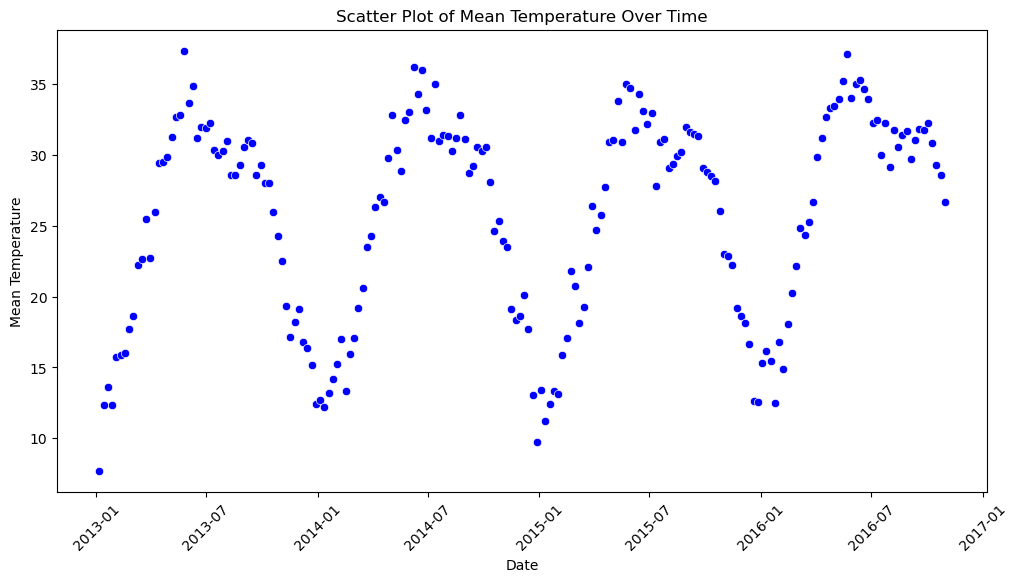

In [51]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x='date', y='meantemp', data=train, color='blue')


plt.xlabel('Date')
plt.ylabel('Mean Temperature')
plt.title('Scatter Plot of Mean Temperature Over Time')


plt.xticks(rotation=45)


plt.show()

## Box plot of temperature

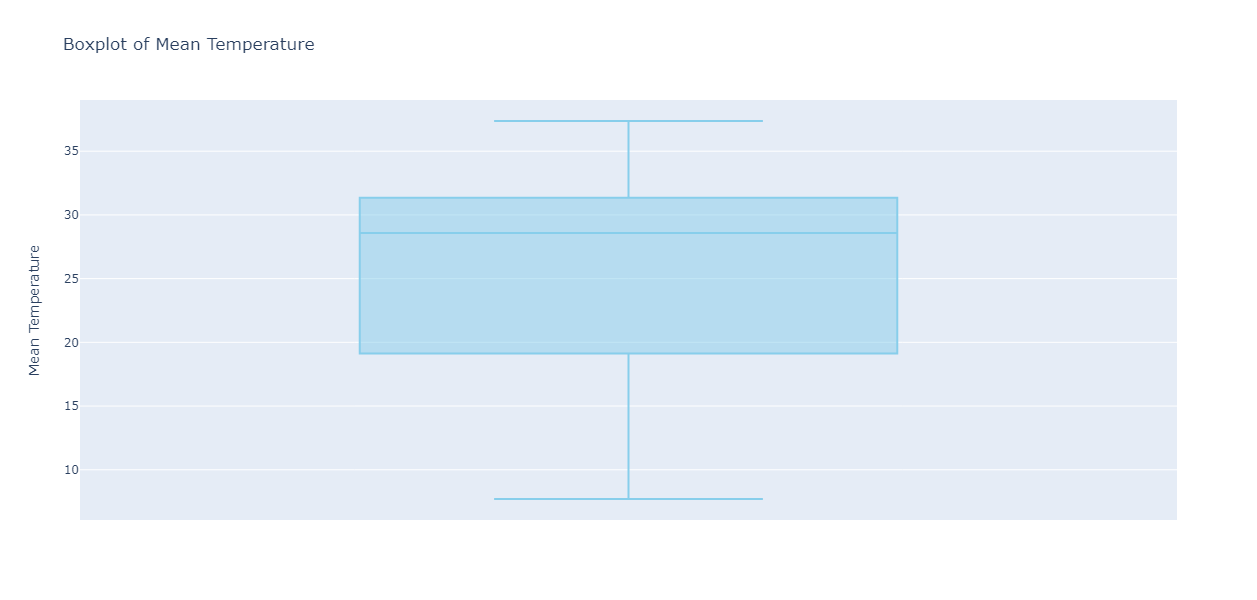

In [52]:
fig = px.box(train, y='meantemp', title='Boxplot of Mean Temperature', color_discrete_sequence=['skyblue'])


fig.update_layout(
    yaxis_title='Mean Temperature',
    xaxis_title='',
    width=800, 
    height=600 
)


fig.show()

In [53]:
# Setting date back as index

train = train.set_index("date")

- We can observe that the time-series is non-stationary and is showing a strong seasonality.
- Let us further check about trend, seasonality and residuals with a decomposition chart.

In [55]:
from statsmodels.tsa.seasonal import seasonal_decompose

## Decomposition Plot

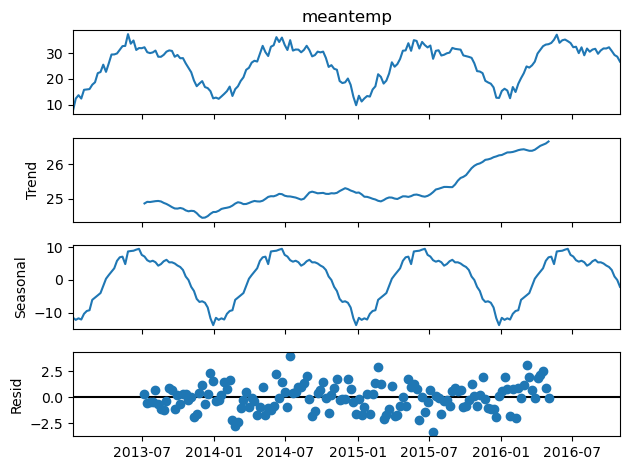

In [60]:
decomposition = seasonal_decompose(train['meantemp'], model='additive')
decomposition.plot()
plt.show()

- Upward trend shows increase in the mean temperatures over the period of time.

- Seasonality indicates temperatures go up and down in a cycle of 12 months (as per different seasons).

**Residual Chart**
- Random Scattering: The residuals appear to be randomly scattered, which is a good sign. This implies that the model has captured the underlying structure of the data well, and the remaining variability (residuals) is random noise.
- Centering Around Zero: The residuals are scattered around the horizontal line at zero, which is good. This indicates that the model's predictions are generally unbiased, meaning that the errors (the differences between the observed and predicted values) are balanced around zero.
- No Apparent Trend Over Time: The residuals do not exhibit any obvious patterns or trends over time. This suggests that the model's performance is consistent over the time period, without systematic overestimation or underestimation in specific periods.

# Stationarity Check: ADF Test

In [61]:
from statsmodels.tsa.stattools import adfuller

In [62]:
def ad_test(dataset):
    dftest = adfuller(dataset, autolag = 'AIC')
    print('1. ADF : ', dftest[0])
    print('2. P-Value : ', dftest[1])
    print('3. Num of Lags : ', dftest[2])
    print('4. Num of Observations Used For ADF Regression and Critical Values Calculation : ', dftest[3])
    print('5. Critical Values : ')
    for key, val in dftest[4].items():
        print('\t',key, ': ', val)

In [64]:
ad_test(train['meantemp'])

1. ADF :  -5.025966063890511
2. P-Value :  1.9711582275560316e-05
3. Num of Lags :  7
4. Num of Observations Used For ADF Regression and Critical Values Calculation :  192
5. Critical Values : 
	 1% :  -3.4648754262570978
	 5% :  -2.876714157488788
	 10% :  -2.574858699001736


- To reject the null hypothesis in an adf test (H0= Time series is non stationary), the p-value has to be less than or equal to 0.05
- In this case, the p-value is less than 0.05 which means the time-series is stationary thus we can reject H0.

- Before we start with manual ARIMA where we determine the AR, I and MA components manually, let us experiment with predicting these components with a function.

# ARIMA

In [76]:
def arima_optimizer_aic(train, orders):
    best_aic, best_params = float("inf"), None
    for order in orders:
        try:
            arma_model_result = ARIMA(train, order=order).fit(disp=0)
            aic = arma_model_result.aic
            if aic < best_aic:
                best_aic, best_params = aic, order
            print('ARIMA%s AIC=%.2f' % (order, aic))
        except:
            continue
    print('Best ARIMA%s AIC=%.2f' % (best_params, best_aic))
    return best_params

In [85]:
p = d = q = range(0, 4)
pdq = list(itertools.product(p, d, q))
best_params_aic = arima_optimizer_aic(train, pdq)

Best ARIMANone AIC=inf


In [67]:
from statsmodels.tsa.arima.model import ARIMA

In [86]:
arima_model = ARIMA(train, best_params_aic).fit()
y_pred_arima = arima_model.forecast(steps=26)
mean_absolute_error(test, y_pred_arima)

6.233715492566089

In [87]:
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:               meantemp   No. Observations:                  200
Model:                 ARIMA(2, 0, 4)   Log Likelihood                -407.980
Date:                Mon, 09 Sep 2024   AIC                            831.959
Time:                        13:46:11   BIC                            858.346
Sample:                    01-06-2013   HQIC                           842.638
                         - 10-30-2016                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         25.0447      1.455     17.209      0.000      22.192      27.897
ar.L1          1.9167      0.036     53.518      0.000       1.847       1.987
ar.L2         -0.9361      0.035    -26.713      0.0

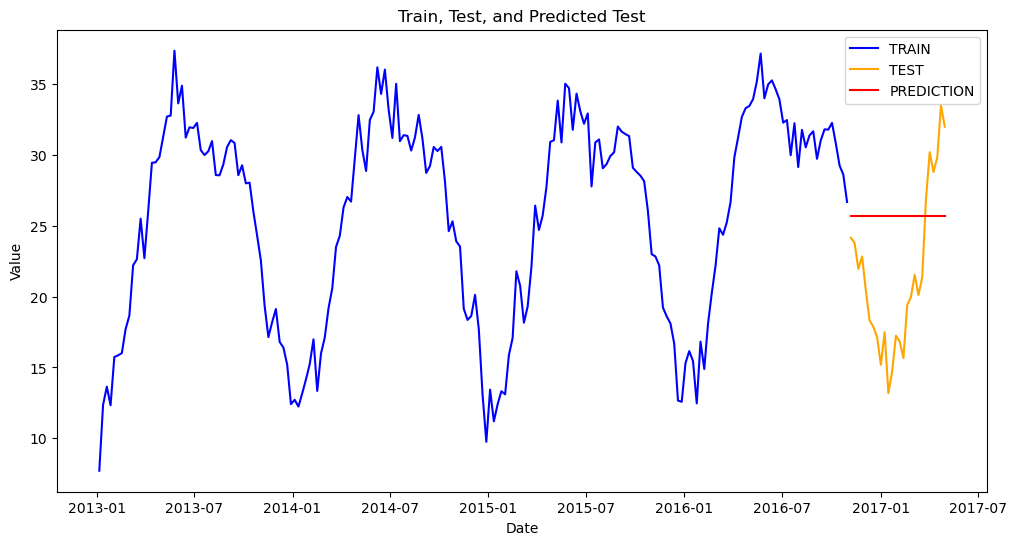

In [94]:
y_pred_arima_series = pd.Series(y_pred_arima, index=test.index)

# Plot all the series
plt.figure(figsize=(12, 6))

# Plot train data
plt.plot(train.index, train, label="TRAIN", color='blue')

# Plot test data
plt.plot(test.index, test, label="TEST", color='orange')

# Plot predictions
plt.plot(y_pred_arima_series.index, y_pred_arima_series, label="PREDICTION", color='red')

plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Train, Test, and Predicted Test')
plt.legend()

plt.show()

- From the above predictions on the test set, it is clear that ARIMA is not able to capture the seasonal fluctuations and thus we need to implement a Seasonal ARIMA (SARIMA) model.

# SARIMA

In [95]:
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 52) for x in list(itertools.product(p, d, q))]

In [97]:
def sarima_optimizer_aic(train, pdq, seasonal_pdq):
    best_aic, best_order, best_seasonal_order = float("inf"), float("inf"), None
    for param in pdq:
        for param_seasonal in seasonal_pdq:
            try:
                sarimax_model = SARIMAX(train, order=param, seasonal_order=param_seasonal)
                results = sarimax_model.fit(disp=0)
                aic = results.aic
                if aic < best_aic:
                    best_aic, best_order, best_seasonal_order = aic, param, param_seasonal
                print('SARIMA{}x{} - AIC:{}'.format(param, param_seasonal, aic))
            except:
                continue
    print('SARIMA{}x{} - AIC:{}'.format(best_order, best_seasonal_order, best_aic))
    return best_order, best_seasonal_order

In [99]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [100]:
best_order, best_seasonal_order = sarima_optimizer_aic(train, pdq, seasonal_pdq)

SARIMA(0, 0, 0)x(0, 0, 0, 52) - AIC:1883.781252308489
SARIMA(0, 0, 0)x(0, 0, 1, 52) - AIC:1731.5188043023436
SARIMA(0, 0, 0)x(0, 1, 0, 52) - AIC:688.6763061921374
SARIMA(0, 0, 0)x(0, 1, 1, 52) - AIC:666.718353163584
SARIMA(0, 0, 0)x(1, 0, 0, 52) - AIC:1179.8318860835516
SARIMA(0, 0, 0)x(1, 0, 1, 52) - AIC:1157.4725546751238
SARIMA(0, 0, 0)x(1, 1, 0, 52) - AIC:670.7223709764355
SARIMA(0, 0, 0)x(1, 1, 1, 52) - AIC:668.6977212488489
SARIMA(0, 0, 1)x(0, 0, 0, 52) - AIC:1633.0195259381505
SARIMA(0, 0, 1)x(0, 0, 1, 52) - AIC:1499.2183532149957
SARIMA(0, 0, 1)x(0, 1, 0, 52) - AIC:669.9027990121738
SARIMA(0, 0, 1)x(0, 1, 1, 52) - AIC:641.4544797009521
SARIMA(0, 0, 1)x(1, 0, 0, 52) - AIC:1123.6690020005126
SARIMA(0, 0, 1)x(1, 0, 1, 52) - AIC:1092.3874680145796
SARIMA(0, 0, 1)x(1, 1, 0, 52) - AIC:646.6776218095547
SARIMA(0, 0, 1)x(1, 1, 1, 52) - AIC:643.4318266144097
SARIMA(0, 1, 0)x(0, 0, 0, 52) - AIC:855.9311520024171
SARIMA(0, 1, 0)x(0, 0, 1, 52) - AIC:852.8988021783808
SARIMA(0, 1, 0)x(0, 1,

In [102]:
model = SARIMAX(train, order=best_order, seasonal_order=best_seasonal_order)
sarima_final_model = model.fit(disp=0)
y_pred_sar = sarima_final_model.get_forecast(steps=26)

In [103]:
y_pred_sarima = y_pred_sar.predicted_mean
mean_absolute_error(test, y_pred_sarima)

1.69390767509726

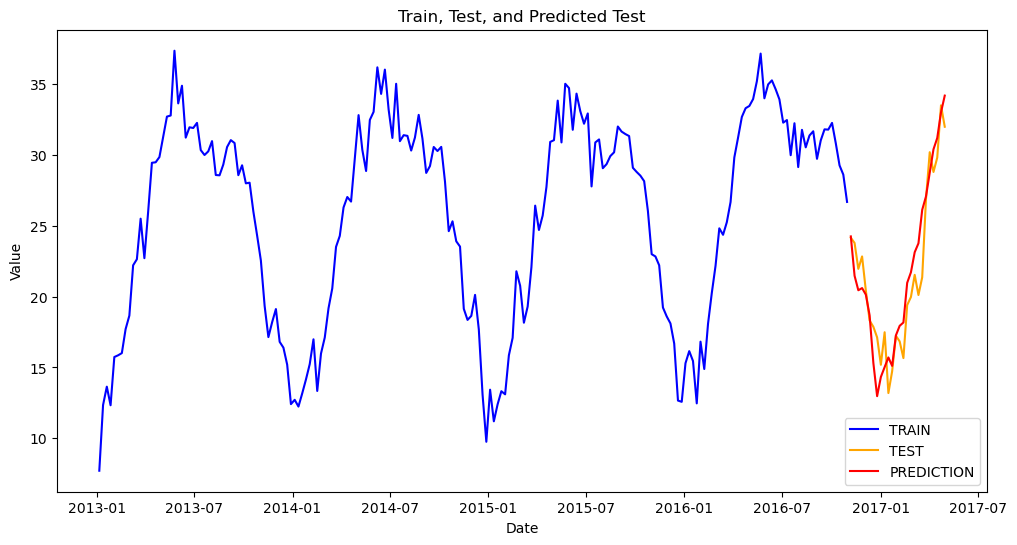

In [105]:
y_pred_sarima_series = pd.Series(y_pred_sarima, index=test.index)

# Plot all the series
plt.figure(figsize=(12, 6))

# Plot train data
plt.plot(train.index, train, label="TRAIN", color='blue')

# Plot test data
plt.plot(test.index, test, label="TEST", color='orange')

# Plot predictions
plt.plot(y_pred_sarima_series.index, y_pred_sarima_series, label="PREDICTION", color='red')

plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Train, Test, and Predicted Test')
plt.legend()

plt.show()

- **We can notice, SARIMA model fits well with the data set**

In [107]:
# Predicted values
y_pred_sarima

2016-11-06    24.255699
2016-11-13    21.474320
2016-11-20    20.450984
2016-11-27    20.606312
2016-12-04    20.140973
2016-12-11    18.685132
2016-12-18    15.316302
2016-12-25    12.971924
2017-01-01    14.329328
2017-01-08    15.024679
2017-01-15    15.706422
2017-01-22    15.109066
2017-01-29    17.265610
2017-02-05    17.940160
2017-02-12    18.173937
2017-02-19    20.976162
2017-02-26    21.722846
2017-03-05    23.137412
2017-03-12    23.767456
2017-03-19    26.134114
2017-03-26    27.074218
2017-04-02    28.751063
2017-04-09    30.409081
2017-04-16    31.204750
2017-04-23    33.017858
2017-04-30    34.200512
Freq: W-SUN, Name: predicted_mean, dtype: float64